# ENG2006 Coursework 2

## Instructions

This assignment carries 15\% of the module mark. Completed work should be submitted via eBART by **12 noon on Friday 29/04/2022**.

#### Asnswering the questions

When answering the questions please keep the following in mind:

+ Your submission should consist of the **present notebook and the imageModel folder created in Question 2 only**, any other files will not be taken into consideration.
+ Each question should be answered in the cell directly after its description. **New cells should not be added to the notebook**.
+ Your questions should consist exclusively of code with comments where necessary.
+ **You should not use any `input` commands**.
+ Whenever requested, **you should use the variable names specified in the description**.

#### Testing your answers

This notebook contains some automated tests, which you can run to test your answers before submission. To do this:

+ Once you have completed each question and executed the corresponding cell, execute the cell directly after it:
    - If your answer passes the tests, a message will appear.
    - If not, an error will be trigered. At the very end of the error message, there will be a possible explanation for why the test failed.
+ Once you have completed all questions, select the option Restart & Run All from the Kernel menu to ensure that all tests can still be pased.

If your answers can pass all the tests and your results seem reasonable, your notebook should be ready for submission. However you should keep in mind that:

+ The tests mainly check that the correct variables are created, and only to a limited extent the validity of the results.
+ Passing the tests does not guarantee the correctness of your solution.
+ Additional tests will be performed after submission.
+ As a result, passing the tests for a specific task does not guarantee that you will be awarded all of the corresponding marks.

#### Submitting your coursework

As mentioned above, your coursework for the python part should consist of the present notebook and the imageModel folder to be created in Question 2 only. Once you have answered all of the questions and tested your answers, save the notebook and add it to a .zip file. **Do not include** the `casting_data` folder provided with the notebook.

## Question 1 [50 marks]

<br />
<br />

<div>
<img src="points.png" width="500" align="center">
</div>

The provided `points.txt` and `labels.txt` files contain coordinates and labels for a set of points in the 2D plane, divided in classes as shown above. Follow the steps below to train a neural network to classify these points:

### Question 1-a [5 marks]

Read the points and labels and plot them with different colors for each class. Store the points in a numpy array named `points` and the labels in an array named `pointLabels`.

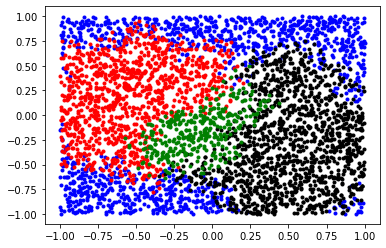

In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#use the numpy loadtxt function to convert the text files containing the points and the labels respectively into arrays name
#points and pointLabels
points = np.loadtxt("points.txt")
pointLabels = np.loadtxt("labels.txt")

#use np.argwhere to find the indices of the points belonging to each class
class0 = np.argwhere(pointLabels==0)
class1 = np.argwhere(pointLabels==1)
class2 = np.argwhere(pointLabels==2)
class3 = np.argwhere(pointLabels==3)

#plot the points belonging to each class using a different color
plt.plot(points[class0,0],points[class0,1],'.b')
plt.plot(points[class1,0],points[class1,1],'.r')
plt.plot(points[class2,0],points[class2,1],'.k')
plt.plot(points[class3,0],points[class3,1],'.g')

plt.show()

#raise NotImplementedError()

In [43]:
#Run this cell to test your answer for Question 1-a
from tests import question1a

question1a(points,pointLabels)

points and labels seem to be defined properly


### Question 1-b [5 marks]

Divide the data set into three parts by performing:

+ A 50-50 split of the original data resulting in a test set consisting of 50% of the original points. Store the points and labels for the test set in variables named `pointsTest` and `pointLabelsTest` respectively.
+ A 80-20 split of the remaining data resulting in:
    + A training set consisting of 40% of the original data. Store the points and labels for the training set in variables named `pointsTrain` and `pointLabelsTrain` respectively.
    + A validation set consisting of 10% of the original data. Store the points and labels for the validation set in variables named `pointsVal` and `pointLabelsVal` respectively.

In [44]:
from sklearn.model_selection import train_test_split

#Define the training and test sets from the data set using the proportions given by the question
pointsTrain, pointsTest, pointLabelsTrain, pointLabelsTest = train_test_split(points,pointLabels, train_size=0.5)

#From the deduced training set, define the training and validation sets using the proportions given by the question
pointsTrain, pointsVal, pointLabelsTrain, pointLabelsVal = train_test_split(pointsTrain,pointLabelsTrain, train_size=0.8)



In [46]:
#Run this cell to test your answer for Question 1-b
from tests import question1b

question1b(pointsTrain,pointsVal,pointsTest,pointLabelsTrain,pointLabelsVal,pointLabelsTest)

Training validation and test sets seem to be defined properly


### Question 1-c [30 marks]

Using tensorflow, train a feedforward neural network to classify the points using hyperparemeter tuning and early stopping. More specifically, your training code should:

+ Consider networks with 1,2 and 4 hidden layers with ReLU activation.
+ Consider networks with 64, 128, 256 and 512 hidden units in each layer.
+ Train using the Adam optimiser with categorical sparse cross entropy and stop if the loss for the validation set does not improve for more than 5 consecutive iterations.
+ Save the network that achieves the best performance, along with the corresponding loss and accuracy for the validation set, number of hidden layers and number of hidden units.

The final model created by the above process should be named `modelOpt`. Similarly, the corresponding loss and accuracy for the validation set, number of hidden layers and number of hidden units should be named `lossValOpt`, `accValOpt`, `layersOpt` and `unitsOpt` respectively.

In [49]:
import tensorflow as tf

#Create arrays to depict the set of discrete values for the number of hidden units and hidden layers the nested for loop will
#proceed to iterate over - as per the question
hiddenUnits = [64,128,256,512]
hiddenLayers = [1,2,4]

# initialise variables
accOpt = 0
accOpt = 0
lossOpt = 0
unitsOpt = 0
layersOpt = 0
modelOpt = 0

for units in hiddenUnits:
    for layers in hiddenLayers:
        #create model
        model = tf.keras.Sequential()

        for count in range(layers):
            model.add(tf.keras.layers.Dense(units,
                                            activation = 'relu'))

        #add final dense layer with softmax activation
        model.add(tf.keras.layers.Dense(4,
                                    activation = 'softmax'))

        #compile and fit model for training set
        model.compile(optimizer='adam',
                          loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                          metrics='accuracy')

        # This will train the model using the callback variable employing the early stopping process and train the model using
        #1000 epochs
        model.fit(pointsTrain, pointLabelsTrain, 
                  validation_data=(pointsVal, pointLabelsVal), 
                  callbacks=[callback], epochs=1000)
    
        #evaluate model for validation set
        lossVal, accVal = model.evaluate(pointsVal,  pointLabelsVal)
    
        #define Early stopping callback with a patience of 5 consecutive iterations
        callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights=True)
    
        if accOpt < accVal: #This will choose the optimum hyperparameters if and only if the current validation set accuracy is
            #greater than the previous optimum accuracy. If the first hidden layer and unit hyperparameters out of each respective
            #set is chosen then all hyperparameters will be assumed to be 0 which is the initialisation value
            modelOpt = model
            layersOpt = layers
            unitsOpt = units
            accOpt = accVal
            lossOpt = lossVal

#print details of optimal model
print('Best loss over test set: ', lossOpt)
print('Best accuracy over validation set: ', accOpt)
print('Number of units selected: ', unitsOpt)
print('Number of hidden layers selected: ', layersOpt)
print(len(modelOpt.layers))
        

#raise NotImplementedError()

Epoch 1/1000
50/50 [==============================] - 0s 3ms/step - loss: 1.1824 - accuracy: 0.6831 - val_loss: 1.0436 - val_accuracy: 0.7275
Epoch 2/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.9743 - accuracy: 0.6950 - val_loss: 0.8663 - val_accuracy: 0.7350
Epoch 3/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.8448 - accuracy: 0.7019 - val_loss: 0.7681 - val_accuracy: 0.7400
Epoch 4/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.7708 - accuracy: 0.7088 - val_loss: 0.7135 - val_accuracy: 0.7475
Epoch 5/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.7229 - accuracy: 0.7163 - val_loss: 0.6777 - val_accuracy: 0.7600
Epoch 6/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.7212 - val_loss: 0.6508 - val_accuracy: 0.7650
Epoch 7/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.6610 - accuracy: 0.7294 - val_loss: 0.6281 - val_accuracy: 0.7675
Epoch 

50/50 [==============================] - 0s 4ms/step - loss: 1.1334 - accuracy: 0.6675 - val_loss: 0.8781 - val_accuracy: 0.7300
Epoch 2/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.7794 - accuracy: 0.7094 - val_loss: 0.6844 - val_accuracy: 0.7375
Epoch 3/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.6677 - accuracy: 0.7150 - val_loss: 0.6144 - val_accuracy: 0.7625
Epoch 4/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.7406 - val_loss: 0.5604 - val_accuracy: 0.7775
Epoch 5/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5580 - accuracy: 0.7631 - val_loss: 0.5192 - val_accuracy: 0.7800
Epoch 6/1000
50/50 [==============================] - 0s 1ms/step - loss: 0.5102 - accuracy: 0.7900 - val_loss: 0.4703 - val_accuracy: 0.8125
Epoch 7/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.8106 - val_loss: 0.4430 - val_accuracy: 0.8250
Epoch 8/1000
50/50 

Epoch 5/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4959 - accuracy: 0.7906 - val_loss: 0.4762 - val_accuracy: 0.8350
Epoch 6/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.8181 - val_loss: 0.4171 - val_accuracy: 0.8500
Epoch 7/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8394 - val_loss: 0.3662 - val_accuracy: 0.8625
Epoch 8/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3759 - accuracy: 0.8506 - val_loss: 0.3483 - val_accuracy: 0.8650
Epoch 9/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.8544 - val_loss: 0.3326 - val_accuracy: 0.8650
Epoch 10/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8581 - val_loss: 0.3172 - val_accuracy: 0.8675
Epoch 11/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8619 - val_loss: 0.2914 - val_accuracy: 0.8800
Epoc

50/50 [==============================] - 0s 2ms/step - loss: 0.5215 - accuracy: 0.7725 - val_loss: 0.4163 - val_accuracy: 0.8500
Epoch 3/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8281 - val_loss: 0.3443 - val_accuracy: 0.8450
Epoch 4/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3740 - accuracy: 0.8400 - val_loss: 0.3275 - val_accuracy: 0.8650
Epoch 5/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3536 - accuracy: 0.8575 - val_loss: 0.3640 - val_accuracy: 0.8525
Epoch 6/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.8575 - val_loss: 0.3083 - val_accuracy: 0.8650
Epoch 7/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3389 - accuracy: 0.8600 - val_loss: 0.2921 - val_accuracy: 0.8725
Epoch 8/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8650 - val_loss: 0.3457 - val_accuracy: 0.8575
Epoch 9/1000
50/50 

In [50]:
#Run this cell to test your answer for Question 1-c
from tests import question1c

question1c(layersOpt,unitsOpt,lossOpt,accOpt,modelOpt,lossVal,accVal,pointsVal,pointLabelsVal)

13/13 [==============================] - 0s 2ms/step - loss: 0.2605 - accuracy: 0.8925
The keras model seems to be defined properly!


### Question 1-d [5 marks]

Evaluate the accuracy and loss of the trained model for the test set and store them in variables named `accTest` and `lossTest` respectively. Then, create and plot the confusion matrix for the test set. Store the matrix as well as the corresponding display object in variables named `pointsConfusionMatrix` and `pointsConfusionMatrixPlot` respectively.

63/63 [==============================] - 0s 2ms/step - loss: 0.2950 - accuracy: 0.8755


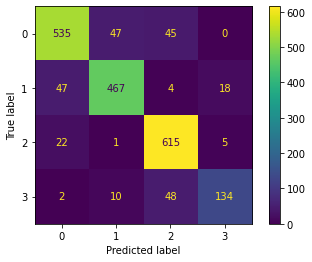

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create variable lossTest and accTest as requested to check accuracy and loss of the trained model.
lossTest, accTest = modelOpt.evaluate(pointsTest, pointLabelsTest)

# Store the predicted labels from modelOpt on the pointsTest data set 
# predProbClassLabel -> Predicted Probabilites to Class Labels.
predProbClassLabel = modelOpt.predict(pointsTest)
predProbClassLabel = np.argmax(predProbClassLabel, axis=1)

# THis will create the confusion matrix.
pointsConfusionMatrix = confusion_matrix(pointLabelsTest, predProbClassLabel)

# plot the created confusion matrix "pointsConfusionMatrix"
pointsConfusionMatrixPlot = ConfusionMatrixDisplay(confusion_matrix=pointsConfusionMatrix)
pointsConfusionMatrixPlot.plot()

#raise NotImplementedError()

In [12]:
#Run this cell to test your answer for Question 1-d
from tests import question1d

question1d(accTest,accOpt,lossTest,pointsConfusionMatrix,pointsConfusionMatrixPlot)

The test set accuracy and confusion matrix seem to be defined properly.


### Question 1-e [5 marks]

Using the function provided in lecture 2, create a contour plot of the decision boundary for the trained model.

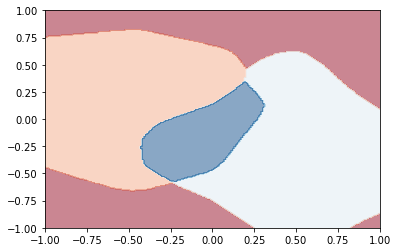

In [14]:
def plotDecisionBoundary(model,limx=[-1,1],limy=[-1,1],resolution=200, colormap = 'RdBu'):
    '''Function to plot the decision boundary of a tensorflow model as a contour plot.
       model is the model, which should have a predict method
       limx, limy are the limits of the plot in x and y
       resolution is the resolution of the plot in terms of the number of points used per direction
       colormap is the colormap to be used for the contour plot
       The function returns a figure and an axis object'''
    
    #create figure
    fig,ax = plt.subplots(1,1)
    
    #create linspaces with the x and y coordinates of the points to be used for the contour plot
    #the limits and resolution are set to the user provided values
    xPoints = np.linspace(limx[0], limx[1], resolution)
    yPoints = np.linspace(limy[0], limy[1], resolution)
    
    #create a meshgrid from the provided
    xx, yy = np.meshgrid(xPoints, yPoints)
    
    #use model to predict the labels of the generated points
    #ravel and c_ are used to bring the coordinates in the correct shape
    modelPred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    #check shape of the output, if the output is twodimensional and the size in the second dimension is more than 1
    #then the ouput is assumed to be provided in terms of probabilities and is converted to class indices using the argmax function
    if len(modelPred.shape)==2 and modelPred.shape[1]!=1:
        modelPred = np.argmax(modelPred,axis=1)
    else:
    #if the output is either onedimensional or the second dimension has size one, 
    #then it is assumed to be labels for binary classification and a 0.5 threshold is applied to convert to binary format
        modelPred = modelPred>0.5
    
    #reshape the labels to the shape of xx and yy so that they can be used for a contour plot
    z = modelPred.reshape(xx.shape)

    #create contour plot
    ax.contourf(xx,yy,z,cmap=colormap,alpha=0.5)
    
    #return figure and axis
    return fig,ax

figure, axis = plotDecisionBoundary(modelOpt)



## Question 2 [50 marks]

<br />
<br />

<div>
<img src="components.png" width="600" align="center">
</div>

The accompanying `casting_data` folder contains images of defective and pristine cast components downloaded from [kaggle](https://www.kaggle.com/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product). The dataset is already split into training and testing parts, stored in the corresponding folders (`train` and `test` respectively). Within each folder, two folders can be found containing images of the defective and pristine components (`def_front` and `ok_front` respectively).

### Question 2-a [5 marks]

Using the function provided in lecture 3, read the files as grayscale images and plot one image from each set. Store the images and the labels in variables named `imagesTrain`, `imageLabelsTrain`,`imagesTest`, `imageLabelsTest` respectively.

Loading folder:  def_front
Loading folder:  ok_front
Loading folder:  def_front
Loading folder:  ok_front


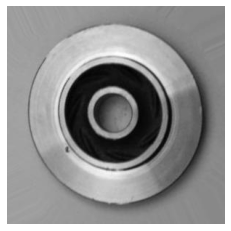

Above is the image for variable imagesTrain


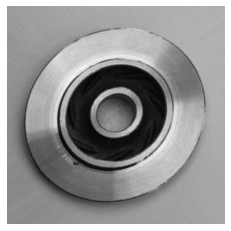

Above is the image for variable imagesTest
(6633, 300, 300)


In [32]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

def loadImageFiles(path, filesPerClass=0, colorFlag=cv2.IMREAD_GRAYSCALE):
    """Function to load images from the provided path directory. 
       It is assumed that, within the directory, different folders will
       contain images from different classes. The optional argument filesPerClass
       can be used to select a subset of the total data from each class,
       if the default value of 0 is used, then all the available files are loaded.
       The optional argument colorFlag specifies how the files should be loaded, the default option is
       cv2.IMREAD_UNCHANGED, which will not change the type of the file, but the options
       cv2.IMREAD_COLOR and cv2.IMREAD_GRAYSCALE can also be used to read images as color and
       grayscale respectively.The function returns a numpy array whose first dimension corresponds to different images,
       and an array with the labels"""
    
    #initialise images and labels as empty lists
    images=[]
    labels=[]
    
    #initialise label counter to 0
    label=0
    
    #use os to find the names of all folders within the provided directory
    folders = os.listdir(path)
    
    #loop extracted folders
    for folder in folders:
        print('Loading folder: ', folder)
        
        #path to each folder
        folderPath=os.path.join(path, folder)
        
        #use os to find the names of all files in each folder
        files=os.listdir(folderPath)
        
        #set the number of files to read
        #if the filesPerClass argument is 0, then all available files are loaded
        #otherwise only the first filesPerClass
        if filesPerClass==0:
            nfiles=len(files)
        else:
            nfiles=filesPerClass
        
        #loop files in directory
        for f in files[:nfiles]:
            #path for each file
            filePath=os.path.join(folderPath, f)
            
            #check whether the created path actually contains a file
            if os.path.isfile(filePath):
                #read image using the provided flag for the type of color
                img = cv2.imread(filePath, colorFlag)
                #append image to the images list
                images.append(img)
                #append label to the labels list
                labels.append(label)
        
        #increase label counter
        label+=1
    
    #convert images and labels converted to numpy arrays
    return np.array(images), np.array(labels)
# Call data "test" and "train" to the variable created dataTest and dataTrain
dataTest = '.\casting_data/test'
dataTrain = '.\casting_data/train'

# This will create imagesTrain, imagesTest, imageLabelsTrain and imageLabelsTest as variables needed. To store label and images.
imagesTrain,imageLabelsTrain = loadImageFiles(dataTrain)
imagesTest,imageLabelsTest = loadImageFiles(dataTest)

#This will plot the imagesTrain's image.
plt.imshow(imagesTrain[0,:,:],cmap='gray')
plt.axis('off')
plt.show()
print('Above is the image for variable imagesTrain')

#This will plot the imagesTest's image.
plt.imshow(imagesTest[0,:,:],cmap='gray')
plt.axis('off')
plt.show()
print('Above is the image for variable imagesTest')

print(imagesTrain.shape)

#raise NotImplementedError()

In [3]:
#Run this cell to test your answer for Question 2-a
from tests import question2a

question2a(imagesTrain,imageLabelsTrain,imagesTest,imageLabelsTest)

Images and labels seem to be defined properly.


### Question 2-b [5 marks]

Normalise all the data and further split the training set into training and validation parts (80-20 split).

In [33]:
from sklearn.model_selection import train_test_split

imagesTrain = imagesTrain / 255.0
imagesTest = imagesTest/255.0

imagesTrain, imagesVal, imageLabelsTrain, imageLabelsVal = train_test_split(imagesTrain,imageLabelsTrain, train_size=0.8)

In [10]:
#Run this cell to test your answer for Question 2-b
from tests import question2b

question2b(imagesTest,imageLabelsTest,imagesTrain,imageLabelsTrain,imagesVal,imageLabelsVal)

Images labels and training/validation sets seem to be defined properly.


### Quesion 2-c[30 marks]

Using tensorflow, train a convolutional neural network to classify the images. The network should:

- Include two convolutional layers with no more than 128 filters, each followed by a max pooling layer.
- Include a number of dense layers and hidden units of your choice.
- Employ early stopping.
- Train within less than 10-15 minutes. Since the exact timing might change in different computers, this requirement is not strict.
- Achieve at least 95% accuracy for the test set. The loss and accuracy obtained for the test set should be stored in variables named `imageAccTest` and `imageLossTest`.

Determining the exact architecture of the network might require some experimentation. Your submission should only include the final architecture chosen, stored in a model named `imageModel`, along with a few comments justifying these choices.

Add your training code in the next cell, without deleting the last line. The last line will save your model such that it can be reused without having to repeat training. The model will be saved in a folder named `imageModel`, which has to be submitted along with the notebook. **Full marks cannot be awarded if this file is missing**.

In [35]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

imageModel = tf.keras.Sequential()

#add convolutional layer, define the input shape of the dataset in this first convolutional layer as (300,300,1) based on the
#dimensions of the imagesTrain dataset array being (6633,300,300)
imageModel.add(tf.keras.layers.Conv2D(15, (3, 3), activation='relu', input_shape=(300, 300, 1)))

#add max pooling layer
imageModel.add(tf.keras.layers.MaxPooling2D((2, 2)))

#add a second convolutional layer again with ReLu activation
imageModel.add(tf.keras.layers.Conv2D(15, (3, 3), activation='relu'))

#add max pooling layer
imageModel.add(tf.keras.layers.MaxPooling2D((2, 2)))

#add flatten layer to convert images to 1d arrays
imageModel.add(tf.keras.layers.Flatten())

#add 1 hidden layer with 64 units and relu activation
imageModel.add(tf.keras.layers.Dense(64,
                                activation = 'relu'))

#add final dense layer with softmax activation
imageModel.add(tf.keras.layers.Dense(2,
                                activation = 'softmax'))

#compile and fit model for training set, set the optimiser to the adam algorithm and use a sparse categorical Cross entropy
#loss function.
imageModel.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 metrics='accuracy')

# This employs the concept of early stopping to find the optimum validation error. The patience value will be set to two consecutive iterations. The
#algorithm also tracks the parameter "val_loss" to evaluate when to terminate training and when to restore the weights to the optimal
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2, restore_best_weights=True)

# The fit() function will fit the model created. It will use the callback method defined by the variable callback and train
#the model for 15 epcohs.
imageModel.fit(imagesTrain, imageLabelsTrain, validation_data=(imagesVal, imageLabelsVal), callbacks=[callback], epochs=15)

# imageModel.evaluate is to evaluate the model created.
imageLossVal, imageAccVal = imageModel.evaluate(imagesVal,  imageLabelsVal)
imageLossTest, imageAccTest = imageModel.evaluate(imagesTest,  imageLabelsTest, verbose=2)

#raise NotImplementedError()

#DO NOT delete the following line, it saves your network once it has been trained so that it can be re-used
imageModel.save('imageModel')

Epoch 1/15
166/166 [==============================] - 81s 484ms/step - loss: 0.6902 - accuracy: 0.6811 - val_loss: 0.4679 - val_accuracy: 0.7898
Epoch 2/15
166/166 [==============================] - 79s 479ms/step - loss: 0.3936 - accuracy: 0.8236 - val_loss: 0.2953 - val_accuracy: 0.8937
Epoch 3/15
166/166 [==============================] - 80s 480ms/step - loss: 0.3022 - accuracy: 0.8754 - val_loss: 0.2497 - val_accuracy: 0.9020
Epoch 4/15
166/166 [==============================] - 80s 480ms/step - loss: 0.2036 - accuracy: 0.9263 - val_loss: 0.1543 - val_accuracy: 0.9578
Epoch 5/15
166/166 [==============================] - 80s 480ms/step - loss: 0.1443 - accuracy: 0.9499 - val_loss: 0.1120 - val_accuracy: 0.9646
Epoch 6/15
166/166 [==============================] - 80s 484ms/step - loss: 0.0913 - accuracy: 0.9727 - val_loss: 0.0813 - val_accuracy: 0.9797
Epoch 7/15
166/166 [==============================] - 80s 482ms/step - loss: 0.0783 - accuracy: 0.9759 - val_loss: 0.0845 - val_ac

Once your model has successfully trained, you can evaluate its accuracy and loss for the test set in the following cell. Again, do not delete the first three lines of this file since they are necessary for your answer to be properly marked.

In [36]:
#DO NOT delete the following lines, they load your previously trained model
import tensorflow as tf
imageModel = tf.keras.models.load_model('imageModel')

#Create the test set for the imageModel
imageLossTest, imageAccTest = imageModel.evaluate(imagesTest,  imageLabelsTest, verbose=2)

23/23 - 3s - loss: 0.0269 - accuracy: 0.9874 - 3s/epoch - 113ms/step


In [37]:
#Run this cell to test your answer for Question 2-c
from tests import question2c

question2c(imageModel,imageLossTest,imageAccTest,imagesTest,imageLabelsTest)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 298, 298, 15)      150       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 149, 149, 15)     0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 147, 147, 15)      2040      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 73, 73, 15)       0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 79935)             0         
                                                                 
 dense_44 (Dense)            (None, 64)              

### Question 2-d [10 marks]

For the first 4 images of the test set, visualise the output of the first 2 filters of each of the convolutional layers.

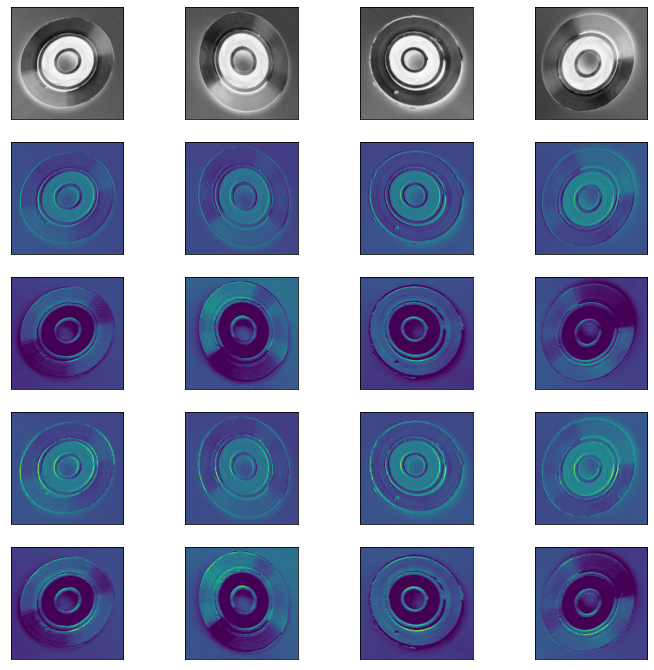

In [38]:
#define a list that contains the first two layers of the training CNN
layerOutputs = [layer.output for layer in imageModel.layers[:2]]

activationModel = tf.keras.models.Model(inputs=imageModel.input, outputs=layerOutputs)

nfig=4 # Number of figures will be 4
images = imagesTest[:nfig]
activations=activationModel.predict(images) #Set filters to each convultional layer.
nfilt=2 #define a count variable to show the number of filters associated with each convolution layer
nfiltTotalFilter=4 # This is to show the total number of filter that is wanted to be shown.

plt.figure(figsize=(12,12))

# Iterate the process of displaying one image 4 times (nfig = 4) to display all for images.
for i in range(nfig):
    # Code that will indicate where figure should be placed.
    plt.subplot(nfiltTotalFilter+1,nfig,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i,:,:], cmap=plt.cm.binary)
a=nfig+1
for i in range(nfilt):
    # This will show the 2 filters that is for the first convolutional layer.
    for j in range(nfig):
        # Code that will indicate where figure should be placed.
        plt.subplot(nfiltTotalFilter+1,nfig,a)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(activations[0][j, :, :, i], cmap='viridis')
        a+=1
b=a   
for i in range(nfilt):
    #Repeat the same process to show the 2 filters corresponding to the second convolutional layer
    for j in range(nfig):
        # Code that will indicate where figure should be placed.
        plt.subplot(nfiltTotalFilter+1,nfig,b)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(activations[1][j, :, :, i], cmap='viridis')
        b+=1
